<a href="https://colab.research.google.com/github/UdayLab/PAMI/blob/main/notebooks/airPollutionAnalytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Walk through: Discovering Frequent Patterns from Big Multiple Time Series Data


> Illustration with 5-year nation-wide air pollution data of Japan



## Introduction

Multiple time series data is ubiqutous. Beneficial patterns that can empower the users with competitive knowledge are hidden in this series. This article describe the process to discover frequently occurring patterns (or frequent patterns) in a multiple time series.  We use the 5-year nation-wide air pollution (PM2.5) data of Japan for illustration purposes.

### Step 1: Download the air pollution dataset [1]



In [4]:
!wget https://www.dropbox.com/s/wa8d1sujzlx56hh/ETL_DATA_new.csv

--2023-07-28 14:13:08--  https://www.dropbox.com/s/wa8d1sujzlx56hh/ETL_DATA_new.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.80.18, 2620:100:6035:18::a27d:5512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.80.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/wa8d1sujzlx56hh/ETL_DATA_new.csv [following]
--2023-07-28 14:13:09--  https://www.dropbox.com/s/raw/wa8d1sujzlx56hh/ETL_DATA_new.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc71bb67550a9e913fd985156b7c.dl.dropboxusercontent.com/cd/0/inline/CAsSn17fzsFXnoS-5ww76l31IBehVH2m1yOXaS9tkfsd5WjyCFIT93Ve3ZfCNCrMpS9m4yHvK8x8Od7LOo9TLPfCQZJ9mgtTUs4O-GIMpnLKMHUNr6wq-BXUfrAi9JhEbXn7zk9jygJZye5rGm556dy_/file# [following]
--2023-07-28 14:13:09--  https://uc71bb67550a9e913fd985156b7c.dl.dropboxusercontent.com/cd/0/inline/CAsSn17fzsFXnoS-5ww76l31IBehVH2m1yOXaS9tkfsd5WjyCFIT93Ve3ZfCNCrMpS9m4yHvK8x8Od7LOo9TLPf

### Step 2: Read the dataset and analyze it

In [13]:
import pandas as pd
dataset = pd.read_csv('ETL_DATA_new.csv', index_col=0)

dataset
# you can notice that dataset is collected from 2018-01-01 01:00:00 hours to 2023-04-25 22:00:00 hours (5+ years)

,TimeStamp,Point(139.0794379 36.3727776),Point(139.1051411 36.3963822),Point(139.0960211 36.4047323),Point(139.0428727 36.3816035),Point(138.9955116 36.33801589999999),Point(139.342672 36.4105658),Point(139.3526243 36.3695416),Point(139.1945766 36.31351160000001),Point(139.2076974 36.3034767),...,Point(139.9418164 36.7656467),Point(140.0549894 36.9688923),Point(139.8775674 36.3847082),Point(139.9101767 36.4393022),Point(139.9074816 36.4445767),Point(140.0934838 36.4673588),Point(139.7422865 36.2305774),Point(139.7151723 36.822353),Point(140.1510903 36.6598314),Unnamed: 1832
,,,,,,,,,,,,,,,,,,,,,
0,2018-01-01 01:00:00,NaN,NaN,5.0,13.0,18.0,20.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,4.0,NaN
1,2018-01-01 02:00:00,NaN,NaN,11.0,12.0,22.0,15.0,NaN,NaN,NaN,...,NaN,6.0,NaN,NaN,NaN,9.0,NaN,NaN,5.0,NaN
2,2018-01-01 03:00:00,NaN,NaN,7.0,12.0,19.0,16.0,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,10.0,NaN,NaN,6.0,NaN
3,2018-01-01 04:00:00,NaN,NaN,5.0,11.0,16.0,11.0,NaN,NaN,NaN,...,NaN,2.0,NaN,NaN,NaN,11.0,NaN,NaN,11.0,NaN
4,2018-01-01 05:00:00,NaN,NaN,6.0,11.0,10.0,8.0,NaN,NaN,NaN,...,NaN,4.0,NaN,NaN,NaN,8.0,NaN,NaN,6.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46000,2023-04-25 18:00:00,NaN,NaN,NaN,22.0,3.0,15.0,NaN,NaN,NaN,...,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN
46001,2023-04-25 19:00:00,NaN,NaN,NaN,21.0,2.0,19.0,NaN,NaN,NaN,...,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN
46002,2023-04-25 20:00:00,NaN,NaN,NaN,20.0,10.0,19.0,NaN,NaN,NaN,...,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN


__Format of the dataset:__ timestamp _tabSpace_ sensorLocation1 _tabSpace_ sensorLocation2 _tabSpace_ ... _tabSpace_ sensorLocationN

### Step 3: Preprocessing the multiple time series data

#### Step 3.1: Removing the timestamp column

In [14]:
dataset.drop('TimeStamp', inplace=True, axis=1)
dataset

,Point(139.0794379 36.3727776),Point(139.1051411 36.3963822),Point(139.0960211 36.4047323),Point(139.0428727 36.3816035),Point(138.9955116 36.33801589999999),Point(139.342672 36.4105658),Point(139.3526243 36.3695416),Point(139.1945766 36.31351160000001),Point(139.2076974 36.3034767),Point(139.3817322 36.2909131),...,Point(139.9418164 36.7656467),Point(140.0549894 36.9688923),Point(139.8775674 36.3847082),Point(139.9101767 36.4393022),Point(139.9074816 36.4445767),Point(140.0934838 36.4673588),Point(139.7422865 36.2305774),Point(139.7151723 36.822353),Point(140.1510903 36.6598314),Unnamed: 1832
,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,5.0,13.0,18.0,20.0,NaN,NaN,NaN,23.0,...,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,4.0,NaN
1,NaN,NaN,11.0,12.0,22.0,15.0,NaN,NaN,NaN,32.0,...,NaN,6.0,NaN,NaN,NaN,9.0,NaN,NaN,5.0,NaN
2,NaN,NaN,7.0,12.0,19.0,16.0,NaN,NaN,NaN,32.0,...,NaN,0.0,NaN,NaN,NaN,10.0,NaN,NaN,6.0,NaN
3,NaN,NaN,5.0,11.0,16.0,11.0,NaN,NaN,NaN,28.0,...,NaN,2.0,NaN,NaN,NaN,11.0,NaN,NaN,11.0,NaN
4,NaN,NaN,6.0,11.0,10.0,8.0,NaN,NaN,NaN,27.0,...,NaN,4.0,NaN,NaN,NaN,8.0,NaN,NaN,6.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46000,NaN,NaN,NaN,22.0,3.0,15.0,NaN,NaN,NaN,16.0,...,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN
46001,NaN,NaN,NaN,21.0,2.0,19.0,NaN,NaN,NaN,14.0,...,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN
46002,NaN,NaN,NaN,20.0,10.0,19.0,NaN,NaN,NaN,13.0,...,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN


#### Step 3.2: Fillup the missing values (NaN) with zero

In [18]:
dataset = dataset.fillna(0)
dataset.head()

,Point(139.0794379 36.3727776),Point(139.1051411 36.3963822),Point(139.0960211 36.4047323),Point(139.0428727 36.3816035),Point(138.9955116 36.33801589999999),Point(139.342672 36.4105658),Point(139.3526243 36.3695416),Point(139.1945766 36.31351160000001),Point(139.2076974 36.3034767),Point(139.3817322 36.2909131),...,Point(140.0549894 36.9688923),Point(139.8775674 36.3847082),Point(139.9101767 36.4393022),Point(139.9074816 36.4445767),Point(140.0934838 36.4673588),Point(139.7422865 36.2305774),Point(139.7151723 36.822353),Point(140.1510903 36.6598314),Unnamed: 1832,tid
,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,5.0,13.0,18.0,20.0,0.0,0.0,0.0,23.0,...,0.0,0.0,0.0,0.0,6.0,0.0,0.0,4.0,0.0,0
1,0.0,0.0,11.0,12.0,22.0,15.0,0.0,0.0,0.0,32.0,...,6.0,0.0,0.0,0.0,9.0,0.0,0.0,5.0,0.0,1
2,0.0,0.0,7.0,12.0,19.0,16.0,0.0,0.0,0.0,32.0,...,0.0,0.0,0.0,0.0,10.0,0.0,0.0,6.0,0.0,2
3,0.0,0.0,5.0,11.0,16.0,11.0,0.0,0.0,0.0,28.0,...,2.0,0.0,0.0,0.0,11.0,0.0,0.0,11.0,0.0,3
4,0.0,0.0,6.0,11.0,10.0,8.0,0.0,0.0,0.0,27.0,...,4.0,0.0,0.0,0.0,8.0,0.0,0.0,6.0,0.0,4


#### Step 3.3: Create an index row titled 'tid'

In [16]:
dataset['tid'] = dataset.index
dataset

<ipython-input-16-ac15396ddfeb>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataset['tid'] = dataset.index


,Point(139.0794379 36.3727776),Point(139.1051411 36.3963822),Point(139.0960211 36.4047323),Point(139.0428727 36.3816035),Point(138.9955116 36.33801589999999),Point(139.342672 36.4105658),Point(139.3526243 36.3695416),Point(139.1945766 36.31351160000001),Point(139.2076974 36.3034767),Point(139.3817322 36.2909131),...,Point(140.0549894 36.9688923),Point(139.8775674 36.3847082),Point(139.9101767 36.4393022),Point(139.9074816 36.4445767),Point(140.0934838 36.4673588),Point(139.7422865 36.2305774),Point(139.7151723 36.822353),Point(140.1510903 36.6598314),Unnamed: 1832,tid
,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,5.0,13.0,18.0,20.0,0.0,0.0,0.0,23.0,...,0.0,0.0,0.0,0.0,6.0,0.0,0.0,4.0,0.0,0
1,0.0,0.0,11.0,12.0,22.0,15.0,0.0,0.0,0.0,32.0,...,6.0,0.0,0.0,0.0,9.0,0.0,0.0,5.0,0.0,1
2,0.0,0.0,7.0,12.0,19.0,16.0,0.0,0.0,0.0,32.0,...,0.0,0.0,0.0,0.0,10.0,0.0,0.0,6.0,0.0,2
3,0.0,0.0,5.0,11.0,16.0,11.0,0.0,0.0,0.0,28.0,...,2.0,0.0,0.0,0.0,11.0,0.0,0.0,11.0,0.0,3
4,0.0,0.0,6.0,11.0,10.0,8.0,0.0,0.0,0.0,27.0,...,4.0,0.0,0.0,0.0,8.0,0.0,0.0,6.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46000,0.0,0.0,0.0,22.0,3.0,15.0,0.0,0.0,0.0,16.0,...,7.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,46000
46001,0.0,0.0,0.0,21.0,2.0,19.0,0.0,0.0,0.0,14.0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,46001
46002,0.0,0.0,0.0,20.0,10.0,19.0,0.0,0.0,0.0,13.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,46002


#### Step 3.4:  Create a dataframe of the sensors having pm25 >= 15
(useful to prune those sensors that do not record any pm2.5 value)

In [20]:
pm25 = pd.DataFrame(columns=["long", "lat", "pm25"])
for col in dataset[2:]:
    res = [i for i in dataset[col].values if i >= 15]
    if len(res) == 0 or col == "Unnamed":
        dataset = dataset.drop([col], axis = 1)
    else:
        if "Poi" in col:
            #print("Hey")
            col = col.strip("Point()")
            col = col.rstrip(").1")
            long, lat = col.split()
            pm25 = pm25._append({'long': float(long), 'lat': float(lat), 'pm25': len(res)}, ignore_index=True)
pm25.head()

,long,lat,pm25
0,139.096021,36.404732,8204.0
1,139.042873,36.381603,8999.0
2,138.995512,36.338016,13929.0
3,139.342672,36.410566,12667.0
4,139.381732,36.290913,10391.0


#### Step 3.5: Drawing the frequency heatmap of sensors

The frequency heatmap provides cruical information regarding how frequently a particular sensor has recorded harmful levels of pollution

In [21]:
import pandas as pd
import plotly.express as px

fig = px.density_mapbox(pm25, lat = 'lat', lon = 'long', z = 'pm25',
                        radius = 8,
                        zoom = 6,
                        mapbox_style = 'open-street-map')
fig.show()

__Inference from the above figure:__  High PM2.5 levels were frequently observed at the south part of Japan, starting from Tokyo.  

#### Step 3.6: Printing the heat map of maximum PM2.5 value recorded by each sensor

In [22]:
maxPM25 = pd.DataFrame(columns=["long", "lat", "maxPM25"])
for col in dataset[1:]:
    res = [i for i in dataset[col].values if i >= 15]
    if len(res) == 0 or col == "Unnamed":
        dataset = dataset.drop([col], axis = 1)
    else:
        if "Poi" in col:
            col = col.strip("Point()")
            col = col.rstrip(").1")
            long, lat = col.split()
            maxPM25 = maxPM25._append({'long': float(long), 'lat': float(lat), 'maxPM25': max(res)}, ignore_index=True)
maxPM25.head()

import pandas as pd
import plotly.express as px

fig = px.density_mapbox(maxPM25, lat = 'lat', lon = 'long', z = 'maxPM25',
                        radius = 8,
                        zoom = 6,
                        mapbox_style = 'open-street-map')
fig.show()

### Step 4: Generating transactional database from the air pollution database

In [24]:
sensorsWithPointInformation = [col for col in dataset if 'Unnamed' in col]
dataset.drop(columns=sensorsWithPointInformation, inplace=True, axis=1)
dataset.head()

,Point(139.0960211 36.4047323),Point(139.0428727 36.3816035),Point(138.9955116 36.33801589999999),Point(139.342672 36.4105658),Point(139.3817322 36.2909131),Point(139.0432674 36.64710669999999),Point(139.5317782 36.2499123),Point(138.9940146 36.4990885),Point(138.8939601 36.25898610000001),Point(138.8275195 36.5786787),...,Point(139.745005 36.5669749),Point(139.6800109 36.7257039),Point(139.8002801 36.313294),Point(140.0136724 36.4403673),Point(140.0155171 36.8708174),Point(139.9239959 36.8062129),Point(140.0549894 36.9688923),Point(140.0934838 36.4673588),Point(140.1510903 36.6598314),tid
,,,,,,,,,,,,,,,,,,,,,
0,5.0,13.0,18.0,20.0,23.0,14.0,26.0,0.0,4.0,3.0,...,2.0,1.0,17.0,11.0,8.0,1.0,0.0,6.0,4.0,0
1,11.0,12.0,22.0,15.0,32.0,16.0,26.0,0.0,2.0,4.0,...,1.0,5.0,23.0,16.0,6.0,0.0,6.0,9.0,5.0,1
2,7.0,12.0,19.0,16.0,32.0,16.0,21.0,0.0,2.0,1.0,...,8.0,1.0,23.0,11.0,3.0,2.0,0.0,10.0,6.0,2
3,5.0,11.0,16.0,11.0,28.0,6.0,24.0,0.0,5.0,1.0,...,5.0,1.0,24.0,11.0,4.0,3.0,2.0,11.0,11.0,3
4,6.0,11.0,10.0,8.0,27.0,9.0,22.0,0.0,8.0,9.0,...,-3.0,4.0,18.0,17.0,3.0,5.0,4.0,8.0,6.0,4


In [25]:
!pip install -U pami

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 796.6/796.6 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19580 sha256=de7ea6db9a284e6cb181a9fd2a6d4bdc51f804e66e26ff2f1f09b996d28b06eb
  Stored in directory: /root/.cache/pip/wheels/f2/ed/dd/d3a556ad245ef9dc570c6bcd2f22886d17b0b408dd3bbb9ac3
  Created wheel for JsonForm: filename=JsonForm-0.0.2-py3-none-any.whl size=3310 sha256=724025e6ca61549005cbbccc5fd47c99f141d31592342c5c3d8d75188e2c80c6
  Stored in directory: /root/.cache/pip/wheels/b6/e5/87/11026246d3bd4ad67c0615682d2d6748bbd9a40ac0490882bd
  Created wheel for JsonSir: filename=JsonSir-0.0.2-py3-none-any.whl size=4750 sha256=aaa21d7e71453cdb80153ac1cb2acdbba3a3e06c78beec3ee871571e71f441b9
  Stored in directory: /root/.cache/pip/wheels/1d/4c/d3/4d9757425983b43eb709be1043d82cd03fb863ce5f56f117e6
Successfully

In [26]:
from PAMI.extras.DF2DB import denseDF2DB as db
obj = db.denseDF2DB(dataset, '>=', 35)
obj.createTransactional('PM24HeavyPollutionRecordingSensors.csv')

### Step 5: Printing the statistics of the database

Database size (total no of transactions) : 45990
Number of items : 1120
Minimum Transaction Size : 1
Average Transaction Size : 12.34333550771907
Maximum Transaction Size : 504
Standard Deviation Transaction Size : 33.75110178589689
Variance in Transaction Sizes : 1139.1616415302162
Sparsity : 0.9889791647252508


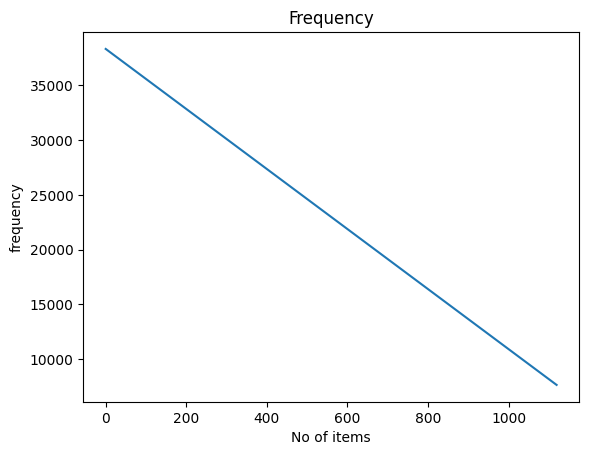

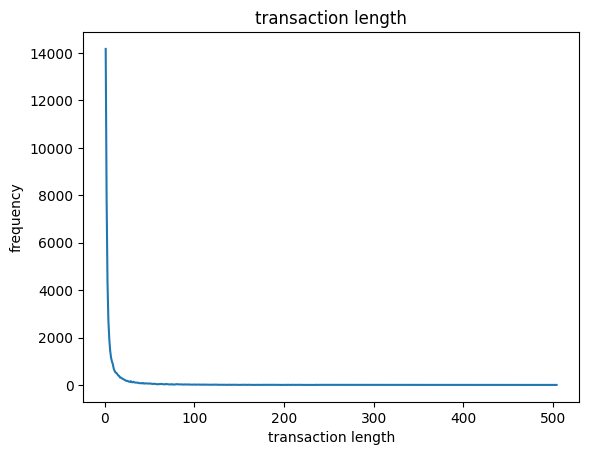

In [27]:
from PAMI.extras.dbStats import transactionalDatabaseStats as tds
obj = tds.transactionalDatabaseStats('PM24HeavyPollutionRecordingSensors.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

### Step 6: Mining Frequent Patterns using FP-growth algorithm

In [29]:
from PAMI.frequentPattern.basic import FPGrowth as ab
obj = ab.FPGrowth('PM24HeavyPollutionRecordingSensors.csv', 500)
obj.startMine()
obj.printResults()
obj.save('soramame_frequentPatterns.txt')

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total number of Frequent Patterns: 2395
Total Memory in USS: 6686269440
Total Memory in RSS 6732873728
Total ExecutionTime in ms: 11.15465235710144


### Step 7: Visualization of Generated Patterns

In [32]:
from PAMI.extras.graph import visualizePatterns as fig

obj = fig.visualizePatterns('soramame_frequentPatterns.txt',10)
obj.visualize()

ValueError: ignored

References:


1.   RAGE, Uday kiran (2023), “5+ Years of Multiple Time Series Data of Hourly PM2.5 Recordings Gathered from Various Sensors Located throughout Japan (1-1-2018 to 25-4-2023)”, Mendeley Data, V1, doi: 10.17632/phgrnvykmr.1
2.   PAMI: PAttern Mining toolkit. https://github.com/UdayLab/PAMI

